## Data Visualization
#### by **Ivan Alducin**
<p><img src="https://i.redd.it/530iwllofvf71.jpg" width="750"</p>

## Comparando histogramas
<p>Vamos a analizar datos de los precios de vivienda en EE.UU, ¿Qué patrones podemos encontrar?. La librería de <code>seaborn</code> proporciona herramientas de visualización para análsis estadistico mucho más sofisticadas</p>

In [2]:
# Importar pandas, seaborn, y matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importa el archivo de House Pricing
df = pd.read_csv('House Pricing.csv')

In [ ]:
# Exploremos el DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


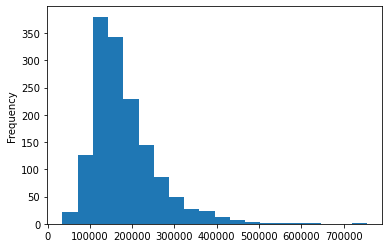

In [ ]:
# Grafica un histograma del Precio de Venta ('SalePrice') con pandas
df['SalePrice'].plot(kind='hist', bins=20)

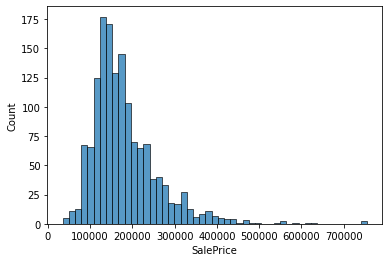

In [ ]:
# Grafica un histograma del precio de venta con seaborn
sns.histplot(df['SalePrice'])

## distplot
<p>La función <code>distplot()</code> nos muestra la <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Densidad Estimada Kernel (KDE)</a>, la cual a grandes rasgos es una forma de suavizar la curva de distribución de una variable </p>

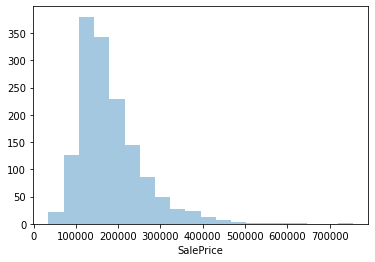

In [ ]:
# Crea un displot del precio de venta con la función KDE desactivada y con 20 bins
sns.distplot(df['SalePrice'], 
             kde=False, 
             bins=20)

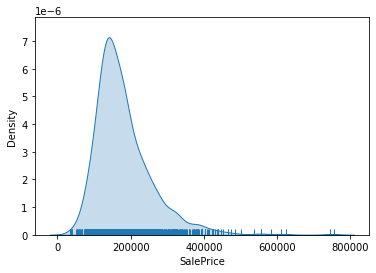

In [ ]:
# Crea un displot del precio de venta con la función hist desactivada y las funciones rug y shade activas
sns.distplot(df['SalePrice'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

## No te olvides de Matplotlib :(
<p>La mayoría de las veces podemos usar la librería de <code>seaborn</code> para visualización de datos, pero a veces es útil usar las funciones de <code>matplotlib</code> para dar una mayor personalización, incluso podemos complementar nuestras visualizaciones agregando información de estadísticos como la <i>media</i>, <i>mediana</i>, etc. Y tambien podemos hacer un estudio más detallado entre algún rango seleccionado dentro de mi variable. Veamos estas funcionalidades a continuación</p>

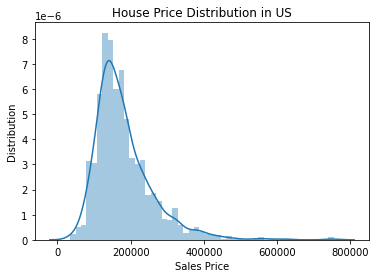

In [ ]:
# Crea la figura y el eje
f, ax = plt.subplots()

# Grafica la distribución de la renta de apartamentos de 1 habitación
sns.distplot(df['SalePrice'], ax=ax)

# Agrega la leyenda al eje X: "Sales Price", al eje Y: "Distribution" y agrega un titulo a la grafica: "House Price Distribution in US"
ax.set(xlabel="Sales Price", 
       ylabel='Distribution', 
       title="House Price Distribution in US")
plt.show()

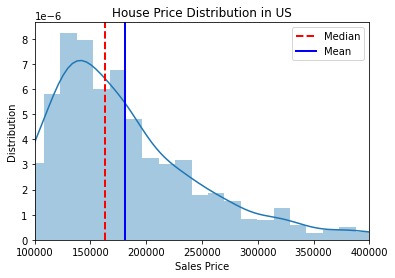

In [ ]:
# Calcula la media y la mediana del precio de venta
import numpy as np

mean = np.mean(df['SalePrice'])
median = np.median(df['SalePrice'])

# Crea el mismo grafico del ejercicio anterior y define un limite entre 100000 y 400000 
f, ax = plt.subplots()
sns.distplot(df['SalePrice'], ax=ax)
ax.set(xlabel="Sales Price", 
       ylabel='Distribution', 
       title="House Price Distribution in US", 
       xlim=(100000, 400000))

# Pero antes de visualizarlo vamos a agregar algunas anotaciones, coloca los valores de la media y la mediana
ax.axvline(x=median, color='r', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Agrega la leyenda a los ejes
ax.legend()
plt.show()

## Graficos de Regresión
<p>La <i>Regresion Lineal</i> es una herramienta útil para comprender y cuantificar la relación entre variables númericas, <code>seaborn</code> cuenta con herramientas de visualización simples pero poderosas para poder ver la tendencia y nos da de forma visual, si asi lo queremos la recta de regresión que mejor ajusta a nuestros datos. Sigamos analizando las variables para los precios de Vivienda en EE.UU</p>

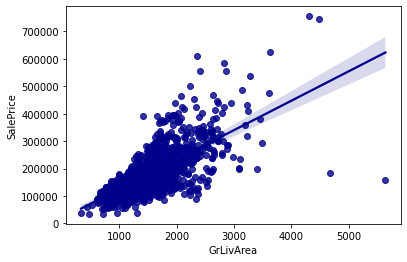

In [ ]:
# Imprime un grafico de regresión entre el precio de venta y el tamaño de la casa ('GrLivArea'), ¿Existe una relación?
sns.regplot(x='GrLivArea', 
            y='SalePrice', 
            data=df,
            color='darkblue')

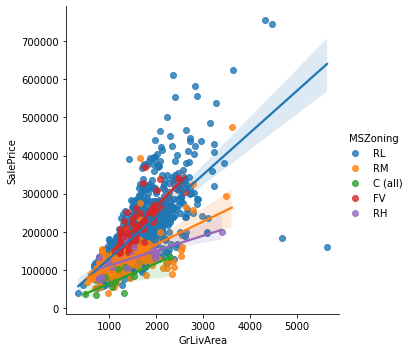

In [ ]:
# Con la funcion lmplot gráfica las variables anteriores pero esta vez lo visualizaremos por Tipo de Zona habitacional ('MSZoning')
sns.lmplot(x='GrLivArea', 
           y='SalePrice', 
           hue='MSZoning', 
           data=df)

<Figure size 864x432 with 0 Axes>

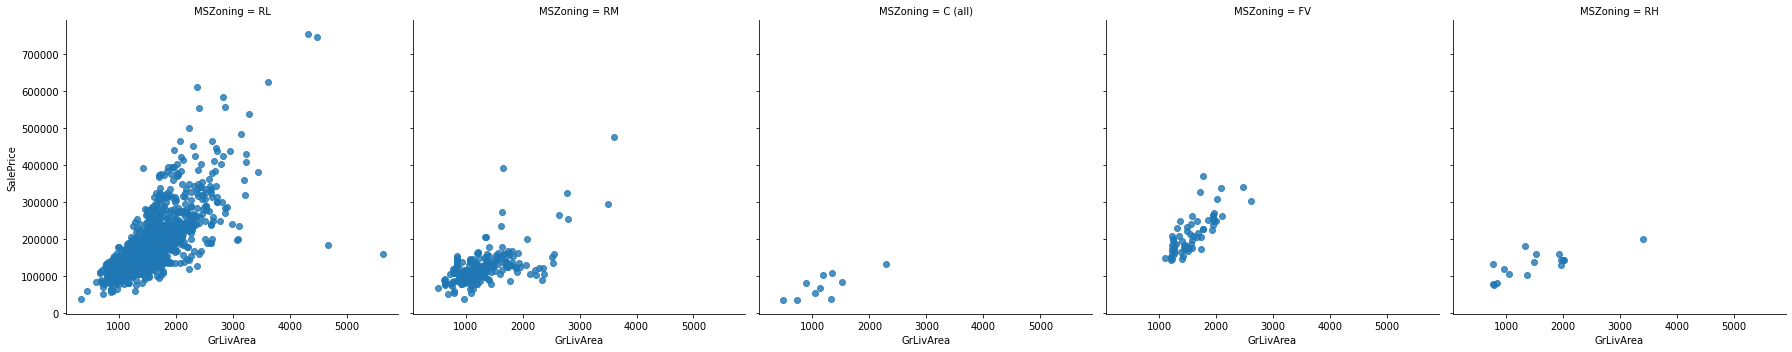

In [ ]:
# la gráfica anterior es complicada de entender, por lo que podemos dividir en filas/columnas las zonas habitables
plt.figure(figsize=(12,6))
sns.lmplot(x='GrLivArea', 
           y='SalePrice', 
           col='MSZoning', 
           data=df,
           fit_reg=False)
plt.show()

## Graficando multiples variables
<p>A la hora de analizar nuestra información generalmente tenemos que comparar multiples variables, en el siguiente ejercicio vamos a poder hacer eso con unas cuantas lineas de código, sin tener la necesidad de graficar variable por variable, con esto nos podemos ahorrar mucho tiempo.</p>

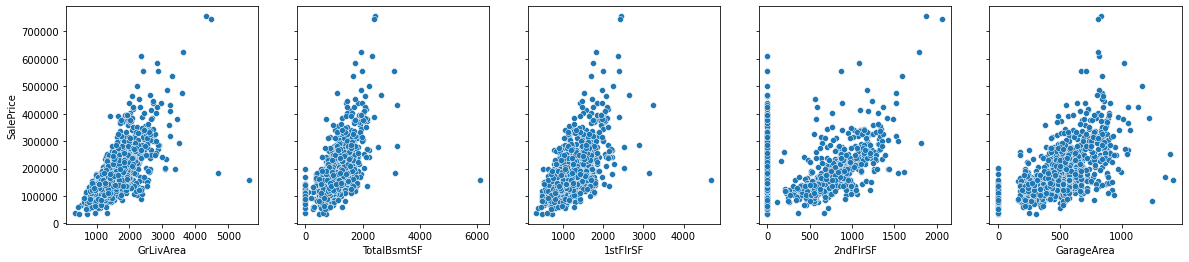

In [ ]:
# Vamos a comparar las siguientes variables con el precio promedio de venta
cols = ['GrLivArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea']

# Grafica la dispersion 
f, ax = plt.subplots(ncols=5, nrows=1, figsize=(20, 4), sharey=True)
for i, c in zip(range(5), cols):
    sns.scatterplot(ax=ax[i], 
                    x=c, 
                    y='SalePrice', 
                    data=df)

## Datos Categóricos
<p>Para los conjuntos de datos categóricos, <code>seaborn</code> tiene diferentes tipos de visualizaciones. Vamos a continuar con el anàlisis de vivienda en EE.UU. ¿Que tipos de graficos existen para visualizar la relación entre variables categoricas/númericas?
<p>

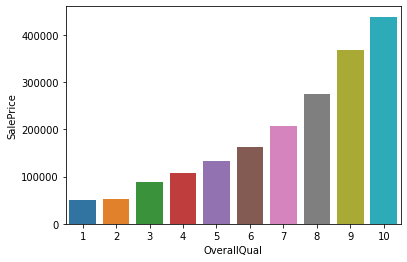

In [ ]:
# ¿El precio depende de la condición en la que se encuentre una casa? Con la tradicional grafica de barras visualizaremos la relación entre la Condiciòn General de la casa ('OverallQual') y el Precio de Venta 'SalePrice'
sns.barplot(data=df,
            x='OverallQual',
            y='SalePrice',
            ci=None)

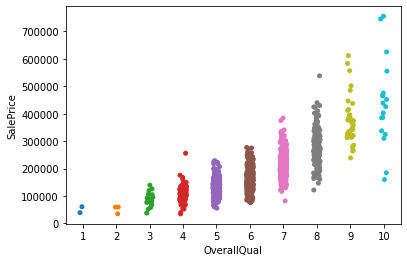

In [ ]:
# Grafica un stripplot para visualizar la proporción entre la Condiciòn General de la casa y el Precio de Venta 'SalePrice' ¿Cual es la diferencia con la gráfica anterior?
sns.stripplot(data=df,
              x='OverallQual',
              y='SalePrice')

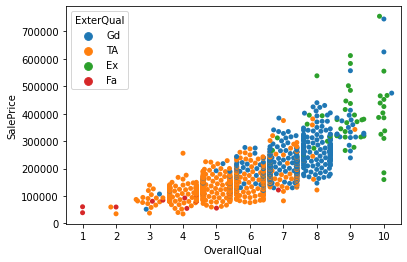

In [ ]:
# Grafica un awarmplot para visualizar la las variables del ejercicio anterior pero ahora agregaremos la variable de Condicion Externa ('ExterQual')
sns.swarmplot(data=df,
              x='OverallQual',
              y='SalePrice',
              hue='ExterQual')

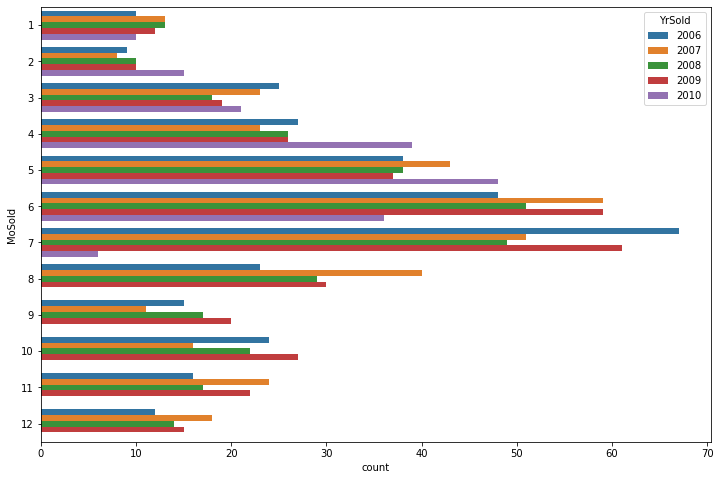

In [ ]:
# ¿Cual es el mes que mas venta de viviendas hay? Graficaremos un countplot para responder a esta pregunta
plt.figure(figsize=(12,8))

sns.countplot(data=df,
              y="MoSold",
              hue="YrSold")

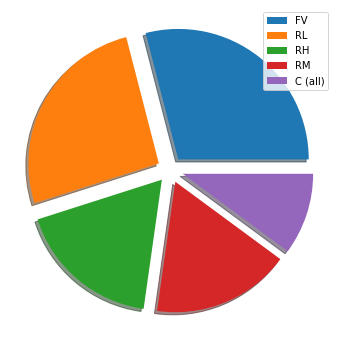

In [ ]:
# ¿Cual es el precio promedio por zona habitacional?
zone = df.groupby('MSZoning')['SalePrice'].mean().reset_index().sort_values('SalePrice', ascending=False)
zone

# Hagamos una grafica de pie
labels = zone['MSZoning'].tolist()
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(6,6))

plt.pie(zone['SalePrice'], 
       shadow=True, 
       explode=explode)
plt.legend(labels)

## Gráficos para distribuciones
<p>Como sabemos los histogramas y los gráficos de caja nos sirven para visualizar la distribución de una variable. Pero veamos que otras posibilidades nos ofrece <code>seaborn</code>
</p>

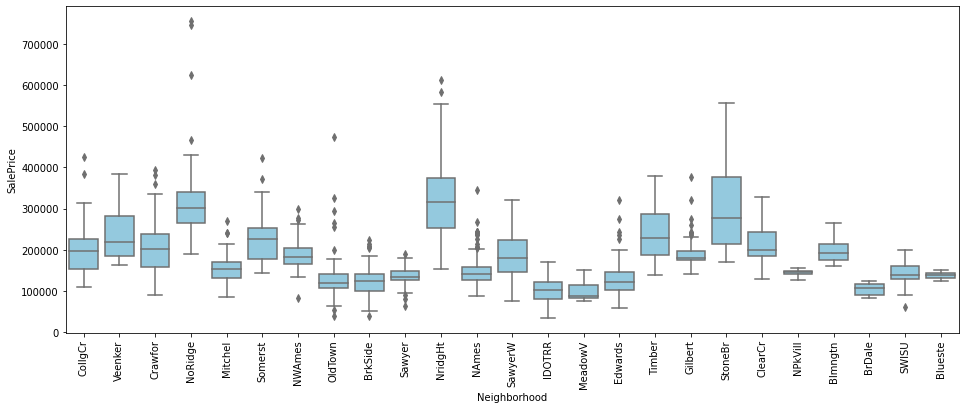

In [ ]:
# Cual es el vecindario con la mayor plusvalia?
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
sns.boxplot(df['Neighborhood'], df['SalePrice'], color='skyblue')

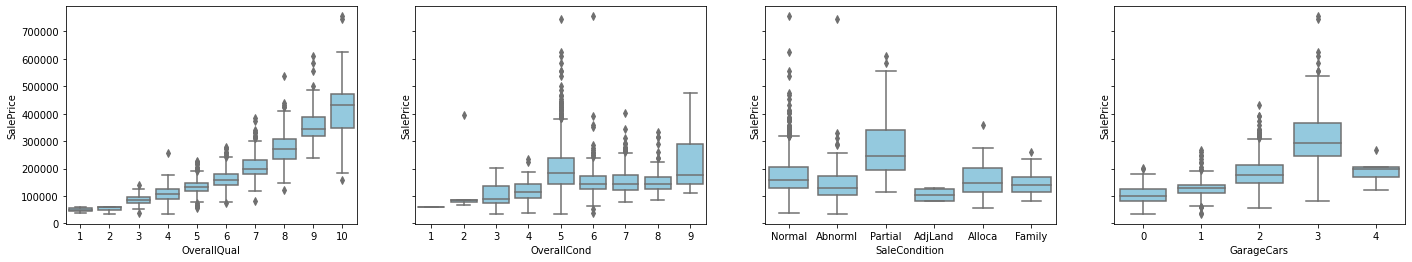

In [ ]:
# ¿Como se ve afectado el precio por las siguientes variables?
cols = ['OverallQual','OverallCond','SaleCondition','GarageCars']

f, ax = plt.subplots(ncols=4, nrows=1, figsize=(24, 4), sharey=True)
for i, c in zip(range(4), cols):
    sns.boxplot(x=c, y='SalePrice', data=df, ax=ax[i], color='skyblue')

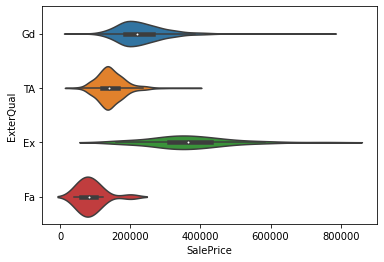

In [ ]:
# ¿Como se distribuye el precio de Venta por las Condiciones del Exterior de las viviendas('ExterQual')? 
sns.violinplot(data=df,
               x='SalePrice',
               y='ExterQual')

## Heatmaps
<p>Un mapa de calor (<i>heatmap</i>) es un diagrama matricial que se puede utilizar para resumir gráficamente la correlación que existe entre dos variables. Cuando tenemos muchas variables dentro un conjunto de datos, podría parecer una tarea dificil calcular y visualizar la relación de cada una de las variables númericas existentes. Pero veamos que no es tan complicado como parece :)</p>

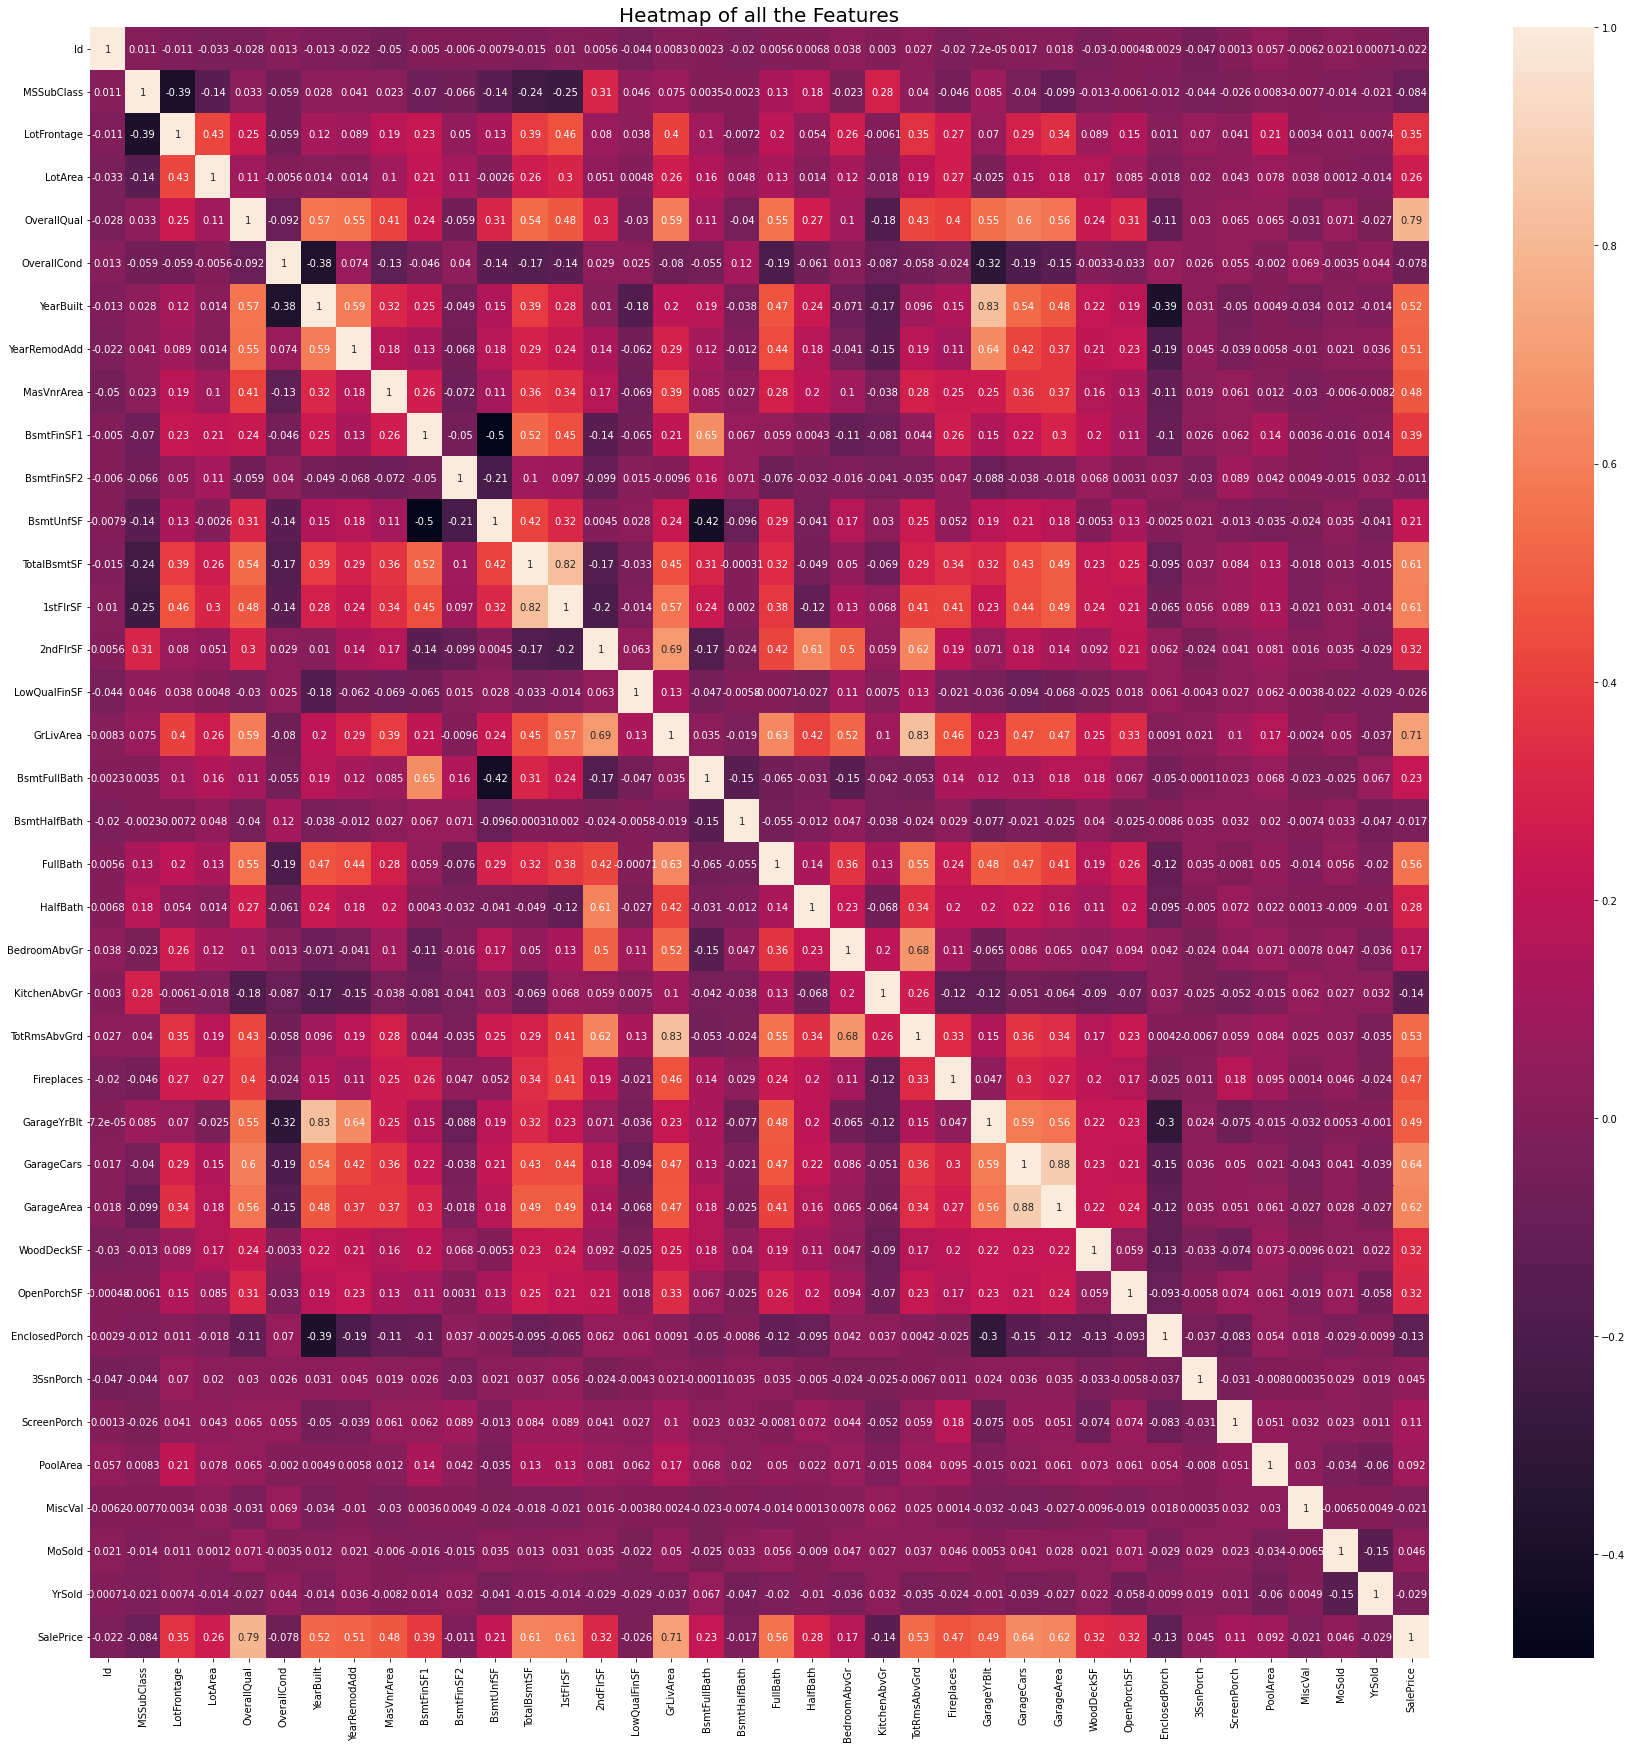

In [ ]:
# Matriz de correlacion
plt.figure(figsize=(30,30))

# Heatmap Plot
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 20);

## FacetGrid
<p>La función <code>FacetGrid</code> nos permite contruir visualiaciones en forma de cuadrícula, las cuales nos permiten crear una serie de gráficos que pueden ser útiles para comprender relaciones complejas de datos. Para estos ejercicios, continuaremos examinando los datos del Departamento de Educación de EE.UU. Para crear una cuadrícula hay que tener en cuenta los siguientes pasos<p/p>
<ul>
    <li>Llamar a la función <code>FacetGrid</code> definiendo filas, columnas, hue, etc</li>
    <li>Mapear las gráficas que estarán contenidas en la cuadrícula</li>
</ul>

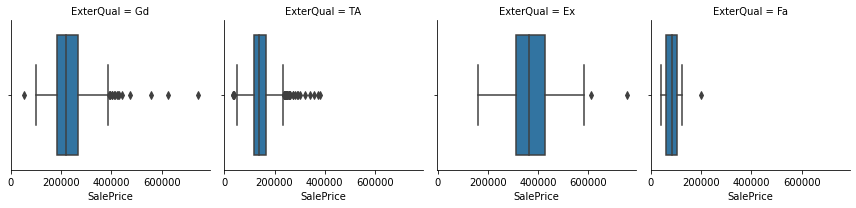

In [ ]:
# Crea una lista con los siguientes parámetros
order = ['Gd', 'TA', 'Ex', 'Fa']

# Crea un FacetGrid con el tipo de grado en las filas y especificando el orden de la lista anterior
g = sns.FacetGrid(df, 
                 col='ExterQual',
                 col_order=order)

# Mapea un boxplot 
g.map(sns.boxplot, 'SalePrice')
plt.show()

## factorplot
<p>En muchos casos, <code>factorplot()</code> puede ser una forma más sencilla de crear un FacetGrid. En lugar de crear una cuadrícula y mapear el gráfico, lo podemos usar para crear un gráfico con unas cuantas línea de código.</p>

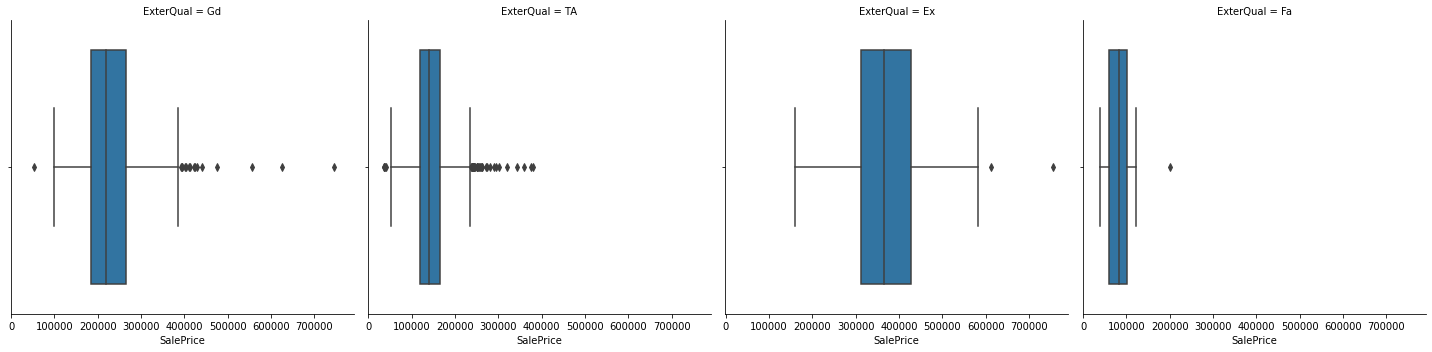

In [ ]:
# Crea un factorplot que contenga un boxplot para los valores de los Precios de Venta ('SalePrice') por tipo de Condición Externa ('ExterQual') 
sns.factorplot(data=df,
               x='SalePrice',
               col='ExterQual',
               kind='box')
plt.show()

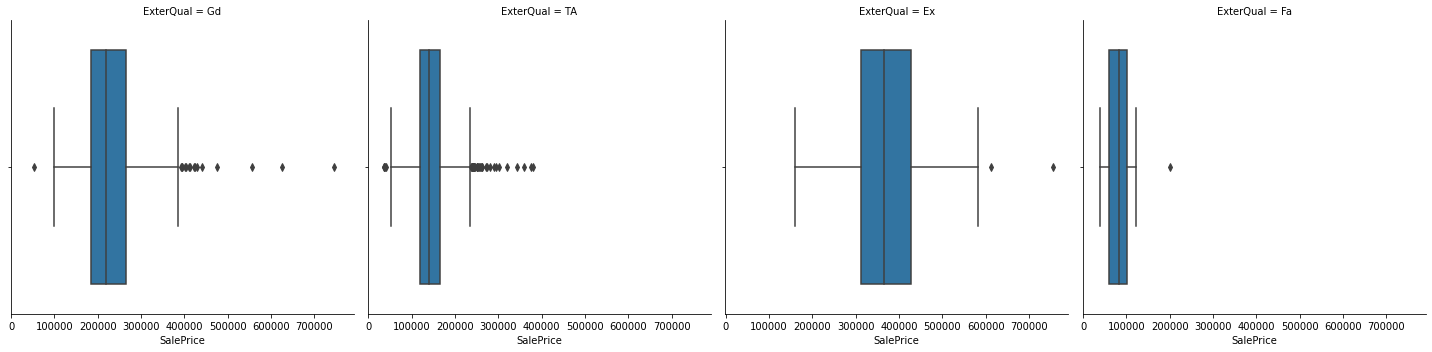

In [ ]:
# Crea un factorplot igual al anterior, pero esta vez con un tipo 'boxen' 
sns.factorplot(data=df,
               x='SalePrice',
               col='ExterQual',
               kind='box')
plt.show()

In [ ]:
# Crea una función que clasifique el precio de venta por rangos (<15k = 'Low', entre 15K y 30K = 'Medium', >30k = 'High')
def PriceRange(x):
    if x < 150000:
        price = 'Low'
    elif 150000 <= x <= 300000:
        price = 'Medium'
    else:
        price = 'High'
    return price

# Crea una nueva columna aplicando la función anterior
df['PriceRange'] =  df.apply(lambda x: PriceRange(x['SalePrice']), axis=1)

## lmplot
<p>Ya hemos visto las diferentes funcionalidades de un <code>lmplot</code>, pero ahora exploraremos un poco mas de sus propiedades. Veremos que podemos tener un desglose completo invluyendo varias variables dentro de un mismo gráfico.</p>

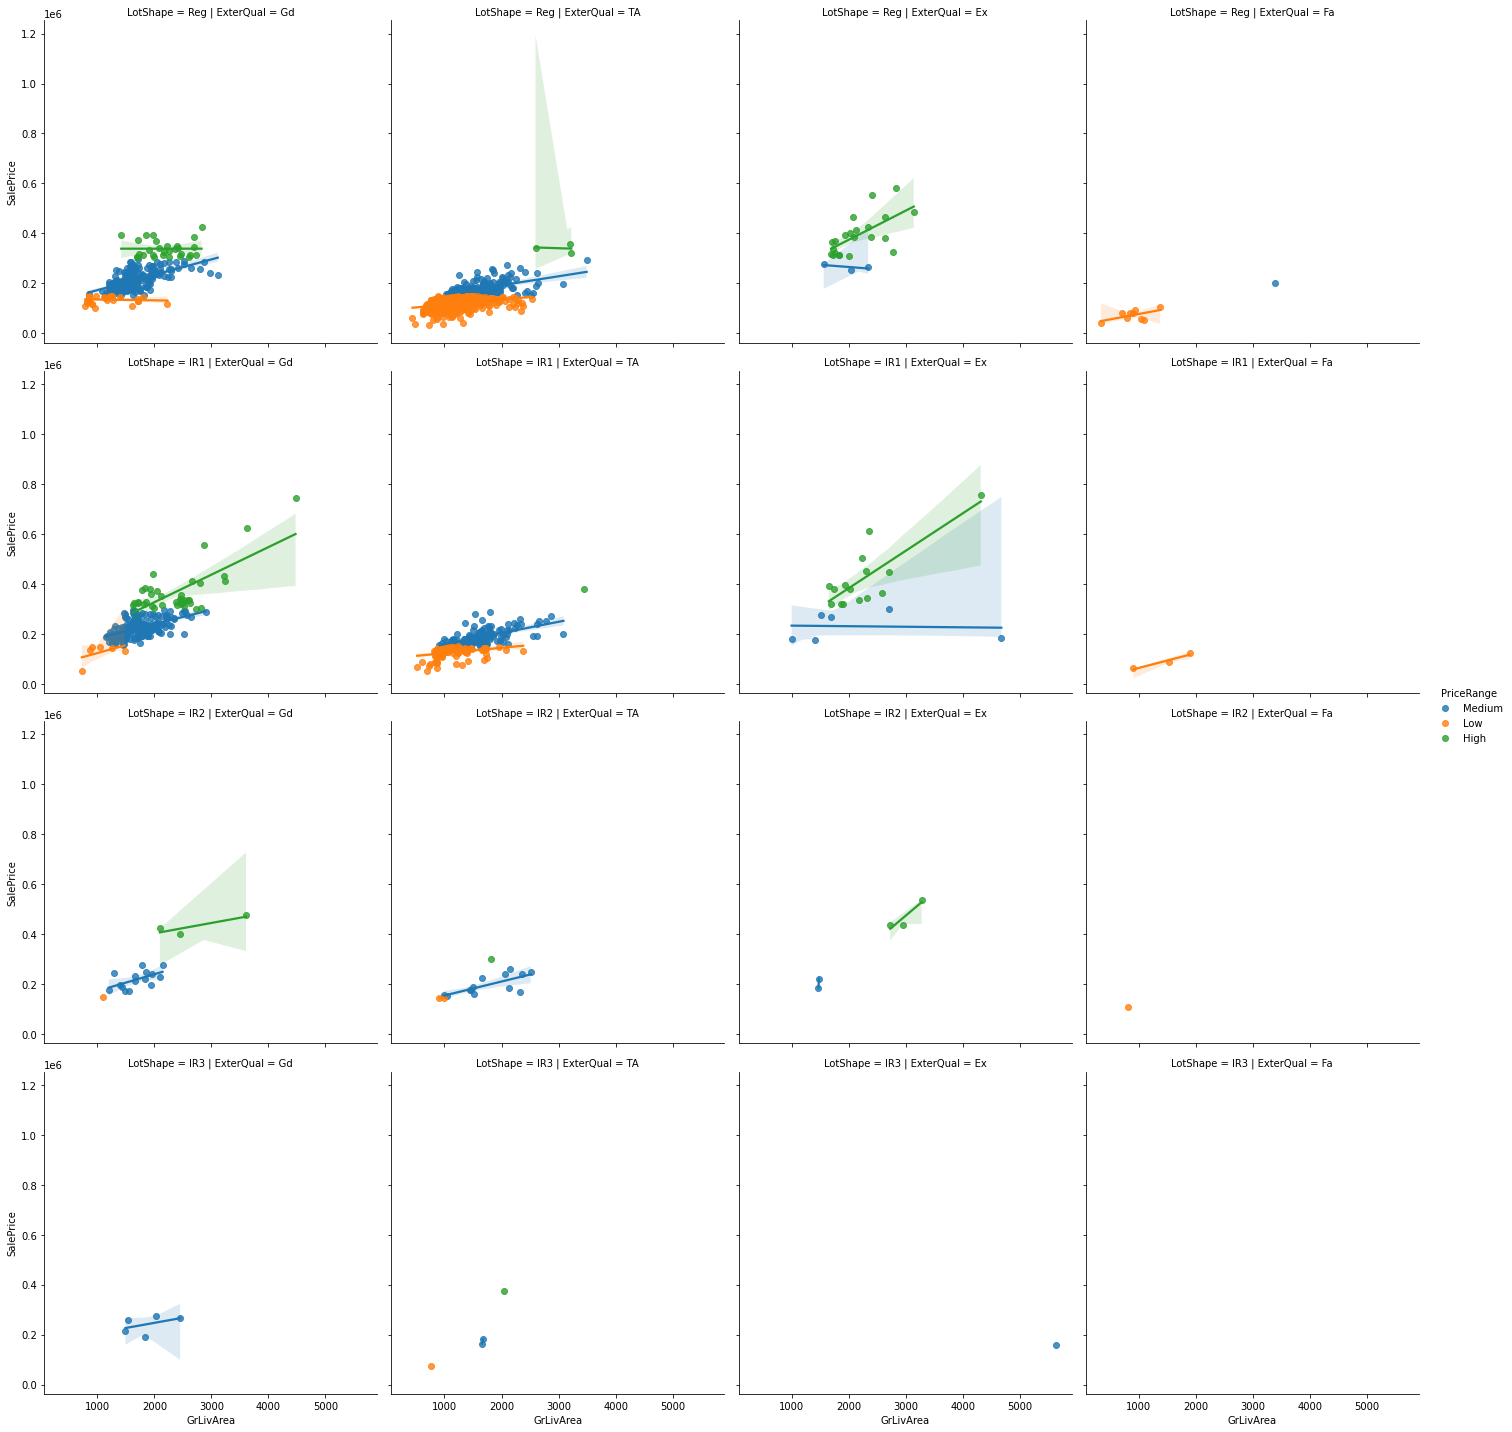

In [ ]:
# Crea un lmplot que muestre la relación entre el Tamaño de la vivienda ('GrLivArea') y el Precio de Venta ('SalePrice') desglosado por Calidad Externa ('ExterQual'), Tamaño del Lote ('LotShape') y la Variable de Rango de Precio ('PriceRange') creada anteriormente 
sns.lmplot(data=df,
           x='GrLivArea',
           y='SalePrice',
           col="ExterQual",
           row='LotShape',
           hue='PriceRange')
plt.show()

## pairplot
<p>La función <code>pairplot()</code> es generalmente una forma más conveniente de ver las relaciones existentes entre varias variables númericas (también podemos incluir variables categóricas), con tan solo unas líneas de codigo, tenemos gráficos que nos pueden proporcionar <i>insights</i> muy significativos dentro de nuestro análisis. Luego, exploraremos alguna funcionalidades adicionales</p>

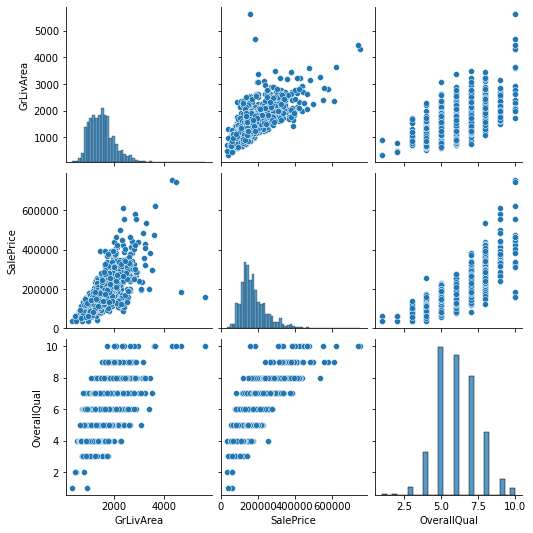

In [ ]:
# Utiliza paiplot para crear una grafica de dispersión entre 'GrLivArea', 'SalePrice' y también 'OverallQual'
sns.pairplot(data=df,
             vars=["GrLivArea", "SalePrice", "OverallQual"],
             kind='scatter')
plt.show()

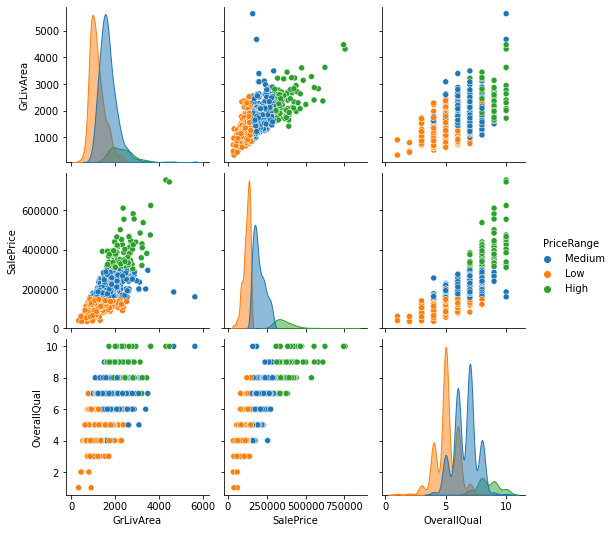

In [ ]:
# Muestra por Rango de Precio ('PriceRange') la gráfica anterior activando la funcionalidad diag_kws
sns.pairplot(data=df,
             vars=["GrLivArea", "SalePrice", "OverallQual"],
             kind='scatter',
             hue='PriceRange',
             diag_kws={'alpha':.5})
plt.show()

## joinplot
<p><code>joinplot</code> combina gráficos univariados como histogramas y gráficos de distibución bivariados como dispersiónes y regresiónes. Estos gráficos también demuestran cómo Seaborn proporciona funciones convenientes para combinar varios gráficos.</p>

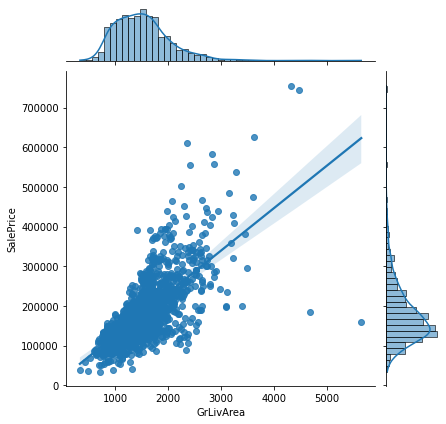

In [ ]:
# ¿Recuerdas que los lmplot pueden llevar gráficos de ordenes superiores?... Explora las siguientes funcionalidades
sns.jointplot(x="GrLivArea",
              y="SalePrice",
              kind='reg',
              data=df)
plt.show()

## Estilos y configuraciones de color
<p>Seaborn ofrece varias opciones para modificar los estilos y colores de nuestras visualizaciones.</p>

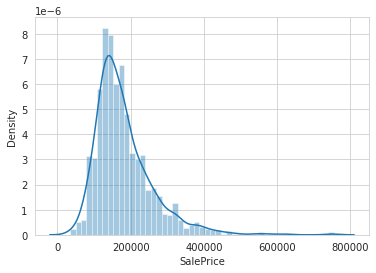

In [ ]:
# Grafica la distribucion del precio de venta. Definamos un estilo 'whitegrid'
sns.set_style('whitegrid')
sns.distplot(df['SalePrice'])
plt.show()

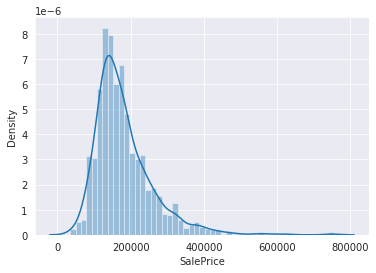

In [ ]:
# Grafica la distribucion de los precios de renta de viviendas de 2 habitaciones ('fmr_2'). Definamos un estilo 'darkgrid'
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'])
plt.show()

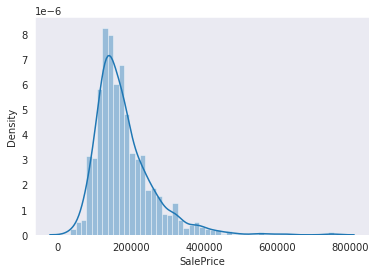

In [ ]:
# Grafica la misma variable del ejercicio anterior pero con un estilo 'dark'
sns.set_style('dark')
sns.distplot(df['SalePrice'])
plt.show()

## Paletas de colores
<p>Dentro de seaborn existen configuraciones para paletas de colores, las cuales pueden ayudar a tener un mejor nivel en visualización, entendimiento y formato a nuestras gráficas. Primero crearemos un par de paletas de colores, y después veremos su funcioanlidad, para ello personalizaremos el <code>Heatmap</code> creado anteriormente que nos permite ver la correlación entre las variables existentes en un conjunto de datos</p>

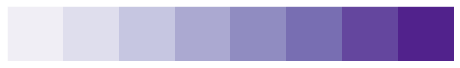

In [ ]:
# Despliega una paleta Purpura con una escala de 8 colores (Purples)
sns.palplot(sns.color_palette('Purples', 8))

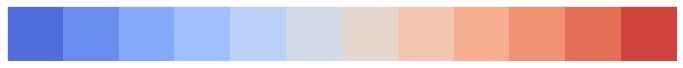

In [ ]:
# Despliega una paleta de Azul a Rojo con una escala de 12 colores (coolwarm)
sns.palplot(sns.color_palette('coolwarm', 12))

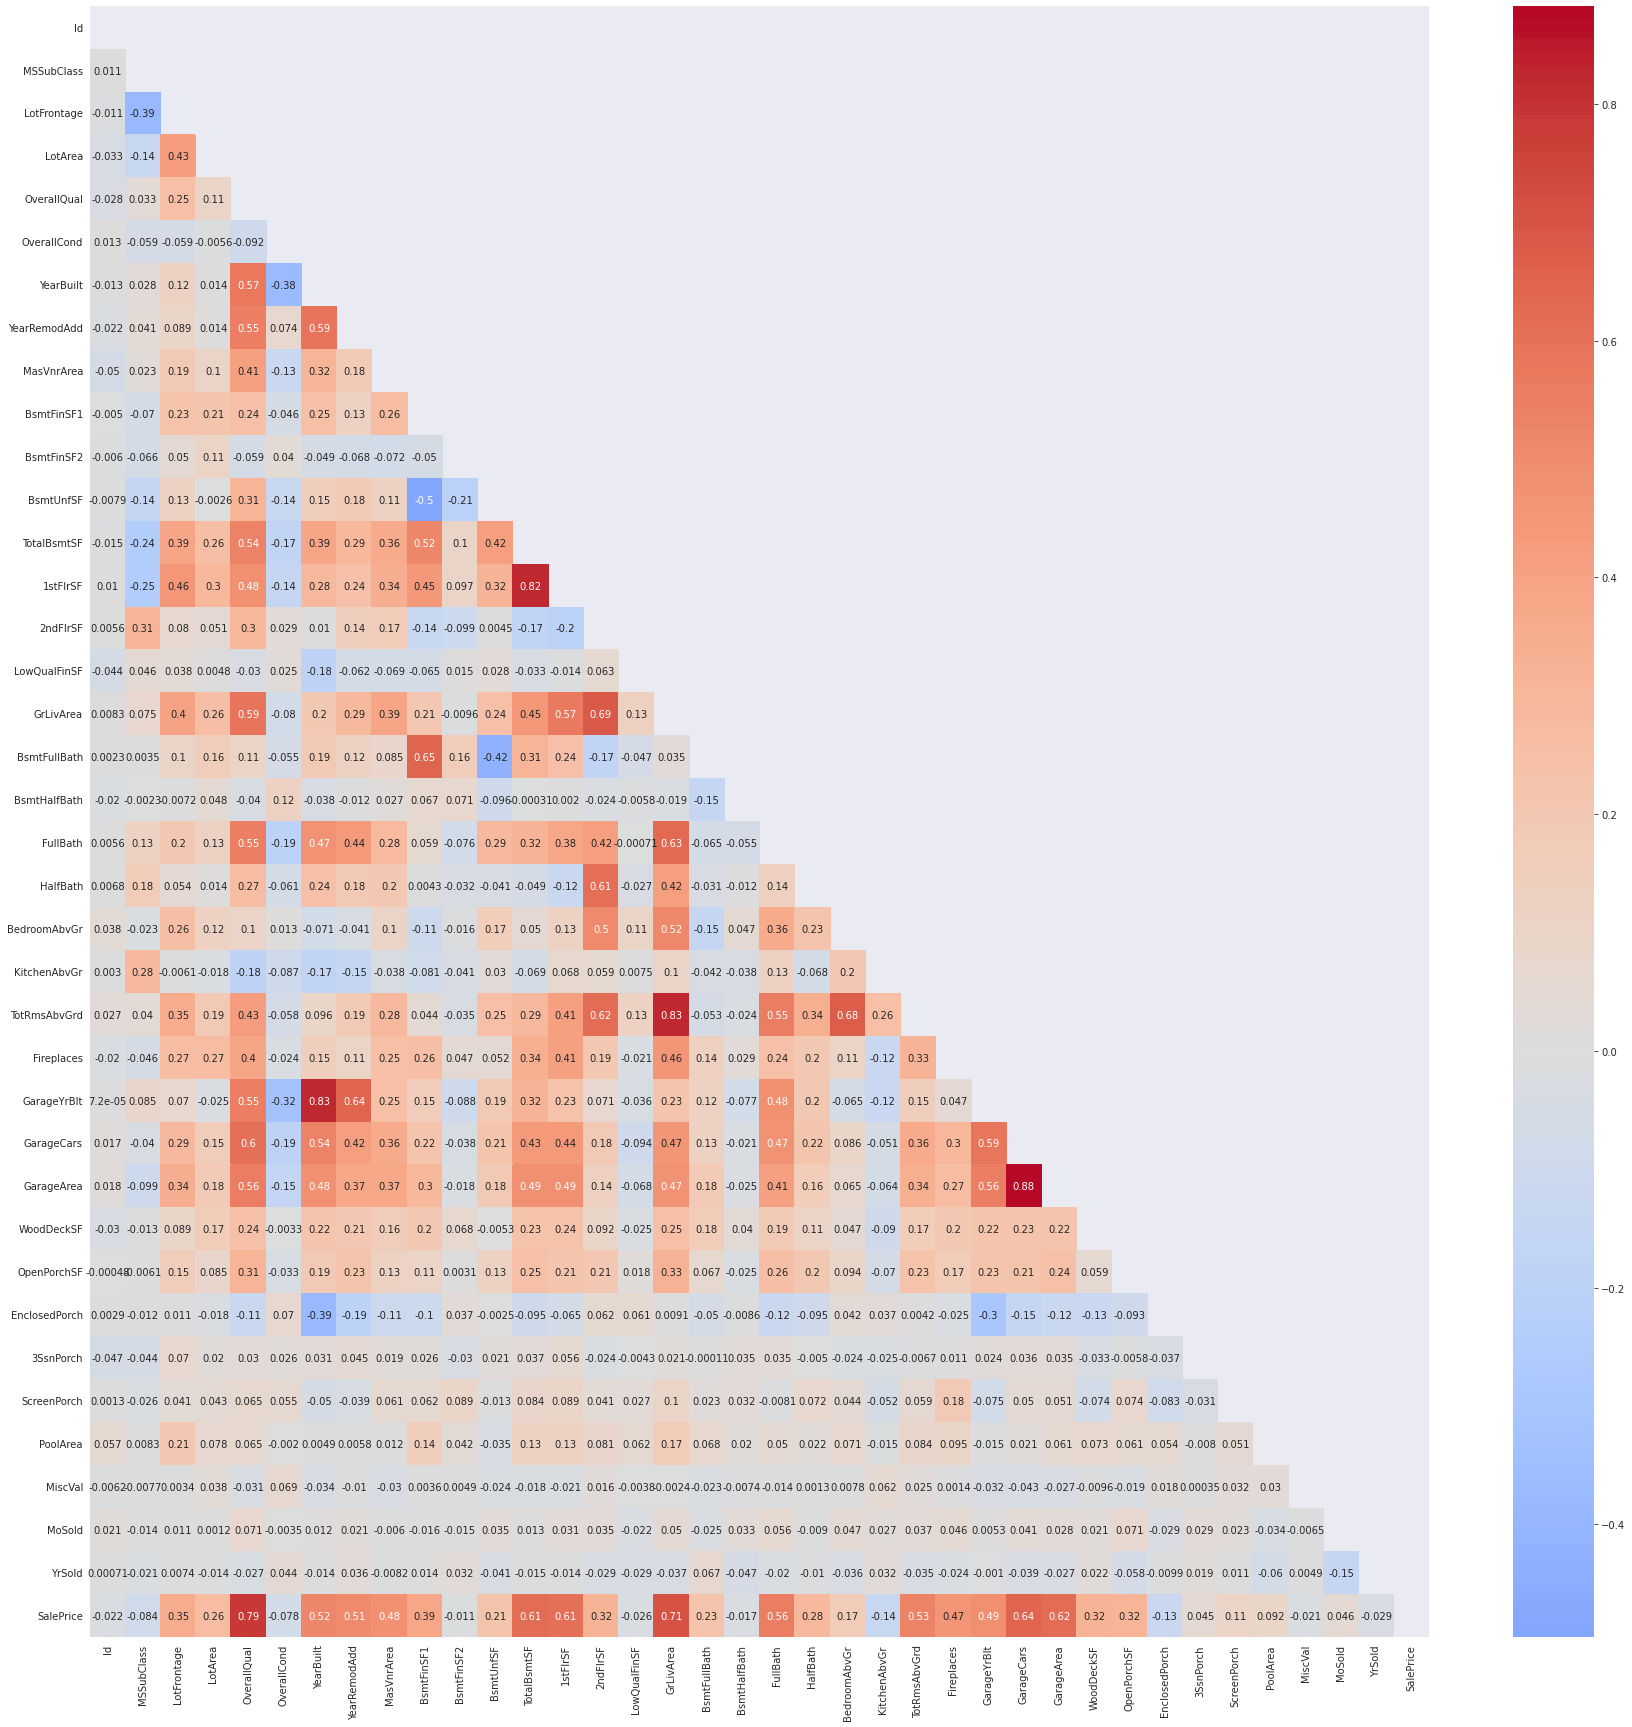

In [ ]:
# Da un tamaño a la gráfica de (30, 30)
plt.figure(figsize=(30,30))
# Con esto quitamos los valores de la matriz de identidad
mask = np.zeros_like(df.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Grafiquemos el Heatmap
sns.heatmap(df.corr(), 
            mask = mask, 
            annot=True, 
            center = 0,
            cmap=sns.color_palette('coolwarm', 200))

## Combinando todo
<p>Se pueden crear gráficos interesantes, al combinar las tecnicas de visualización vistas, a continuación te dejo un gráfico que puedes utilizar para complementar tu <i>Análisis Exploratorio de Datos</i> ;)</p>

In [ ]:
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats

style.use('fivethirtyeight')

# Funcion para graficar el detalle completo de la distribución de 1 variable
def plot_dist_char(df, feature):
    #Figura 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    # Media y Desviacion Estandar
    mu = np.mean(df[feature])
    sigma = np.std(df[feature])

    # Histograma
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])

    # QQ Plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    stats.probplot(df.loc[:,feature], plot = ax2)
    ax2.set_title('')

    # Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot') 
    sns.boxplot(y = df.loc[:,feature], ax = ax3)

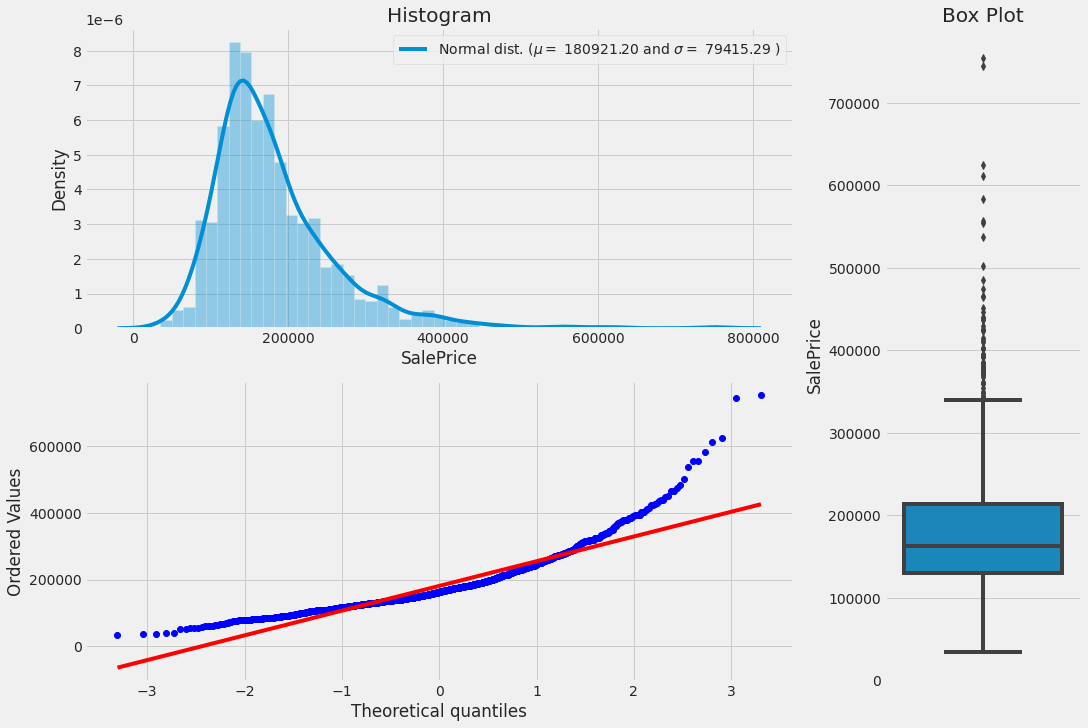

In [ ]:
# Aplica la función anterior a alguna variable (númerica) del DataFrame
plot_dist_char(df, 'SalePrice')